__Анализ данных и проверка некоторых гипотез для сервиса аренды самокатов GoFast.__

__Заголовок:__ Анализ данных о клиентах и их поездках сервиса аренды самокатов GoFast. 

__Описание проекта:__ Сервисы аренды самокатов, вновь появившиеся на рынке, еще не имеют утвержденных стандартов и метрик, определяющих их эффективность и качество обслуживания. В связи с этим необходимость в аналитике данных становится крайне важной, поскольку она позволяет компаниям адаптироваться к изменчивым требованиям рынка и разрабатывать оптимальные стратегии для улучшения сервиса и удовлетворения потребностей пользователей.

__Цель проекта:__ Проанализировать результаты исследований, направленных на выявление ключевых факторов влияния на бизнес-модель и эффективность сервиса аренды самокатов. В результате анализа гипотез, связанных с продолжительностью поездок, использованием подписок, оптимальным расстоянием, месячной выручкой и техническим обновлением, создать выводы и рекомендации для оптимизации стратегии компании.

__Ход исследования:__
Шаг 1. Загрузка данных
Шаг 2. Предобработка данных
Шаг 3. Исследовательский анализ данных
Шаг 4. Объединение данных
Шаг 5. Подсчёт выручки
Шаг 6. Проверка гипотез

__Общий вывод:__ резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.


__Шаг 1. Загрузка данных__

1.1 Считывание CSV-файлов с данными и вывод первых строк каждого файла

In [1]:
import pandas as pd
import math
from scipy.stats import ttest_ind, ttest_1samp
import matplotlib.pyplot as plt

In [2]:
data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep=',')
display(data_users.head(5))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep=',')
display(data_rides.head(5))

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
data_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep=',')
display(data_subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


1.2 Изучение общей информации о каждом файле

In [5]:
display(data_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

Пользователи — users_go.csv

user_id  -  уникальный идентификатор пользователя

name  -  имя пользователя

age  -  возраст

city  -  город

subscription_type  -  тип подписки (free, ultra)

In [6]:
display(data_rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

Поездки  -  rides_go.csv

user_id  -  уникальный идентификатор пользователя

distance  -  расстояние, которое пользователь проехал в текущей сессии (в метрах)

duratio  -  продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date  -  дата совершения поездки

In [7]:
display(data_subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

Подписки  -  subscriptions_go.csv

subscription_type  -  тип подписки

minute_price  -  стоимость одной минуты поездки по данной подписке

start_ride_price  -  стоимость начала поездки

subscription_fee  -  стоимость ежемесячного платежа

__Шаг 2. Предобработка данных__

2.1 Приведем стобец data к типу даты pandas

In [8]:
display(data_rides['date'].head(5))

0    2021-01-01
1    2021-01-18
2    2021-04-20
3    2021-08-11
4    2021-08-28
Name: date, dtype: object

In [9]:
data_rides['date'] = pd.to_datetime(
    data_rides['date'], format='%Y-%m-%d')

In [10]:
display(data_rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

2.2 Создание нового столбца с номером месяца

In [11]:
data_rides['month'] = data_rides['date'].dt.month

In [12]:
display(data_rides.head(5))

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


2.3 Проверка наличия пропущенных значений и дубликатов в датафреймах

In [13]:
data_users.isna().sum().sort_values(ascending = False)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
data_rides.isna().sum().sort_values(ascending = False)

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [15]:
data_subscriptions.isna().sum().sort_values(ascending = False)

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений нет

Приступим к поиску дубликатов

Заметим, что в первых двух таблицах не должно быть дубликатов, ведь  в перовй таблице есть уникальный для каждой строчки праметр user_id, а для второй таблицы есть вероятность того, что один и тот же пользователь в одну и ту же дату взял самокат и проехал одинаковое расстояние по времени и расстоянию, но такое очень маловероятно ведь время и дистанция поездки считаются очень точно( с несколькими цифрами после запятой). В третей же таблице дубликатов быть не может, ведь там всего 2 строчки.

In [16]:
print(data_users.duplicated().sum())

31


In [17]:
data_users = data_users.drop_duplicates().reset_index(drop=True)

In [18]:
print(data_users.duplicated().sum())

0


In [19]:
print(data_rides.duplicated().sum())

0


Явные дубликаты удалили, теперь приступим к поиску неявных дубликатов

In [20]:
print(data_users['city'].unique())

['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


In [21]:
print(sorted(data_users['name'].unique()))

['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад', 'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат', 'Игорь', 'Ильдар', 'Илья', 'Инна', 'Ирина', 'Камилла', 'Карина', 'Каролина', 'Кира', 'К

Неявных дубликтов не было обнаружено 

In [22]:
data_rides['disatnce'] = data_rides['distance'].round()
display(data_rides.head(10))
#data_rides['duration'] на предмет наличия аномалий я проверяю в следующем шаге

,user_id,distance,duration,date,month,disatnce
0,1,4409.919140,25.599769,2021-01-01,1,4410.0
1,1,2617.592153,15.816871,2021-01-18,1,2618.0
2,1,754.159807,6.232113,2021-04-20,4,754.0
3,1,2694.783254,18.511000,2021-08-11,8,2695.0
4,1,4028.687306,26.265803,2021-08-28,8,4029.0
5,1,2770.890808,16.650138,2021-10-09,10,2771.0
6,1,3039.020292,14.927879,2021-10-19,10,3039.0
7,1,2842.118050,23.117468,2021-11-06,11,2842.0
8,1,3412.690668,15.238072,2021-11-14,11,3413.0
9,1,748.690645,15.041884,2021-11-22,11,749.0


__Шаг 3. Исследовательский анализ данных__

Опишем и визуализируем общую информацию о пользователях и поездках

3.1 частота встречаемости городов

In [23]:
display(data_users['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

<AxesSubplot:title={'center':'Зависимость количества пользователей от города'}, xlabel='Город', ylabel='Количество пользователей'>

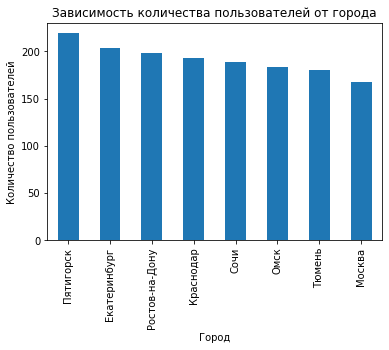

In [24]:
data_users['city'].value_counts().plot(kind='bar', xlabel = 'Город', ylabel = 'Количество пользователей',  title='Зависимость количества пользователей от города')


    
Наибольшее количесвто пользователей проживает в городе Пятигорск, но разница между Москвой, где пользователей нименьшее количество и Пятигорском составляет всего 50 человек



3.2 соотношение пользователей с подпиской и без подписки

In [25]:
display(data_users['subscription_type'].value_counts())

free     835
ultra    699
Name: subscription_type, dtype: int64

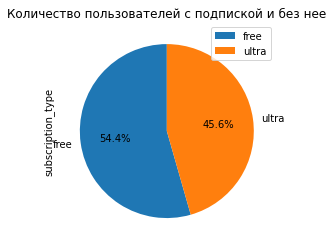

In [26]:
subscription_counts = data_users['subscription_type'].value_counts()

subscription_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True)

plt.title('Количество пользователей с подпиской и без нее')

plt.show()


Пользователей с подпиской и без нее примерно одинаковое количество, но все же пользователей без подписки немного больше( 54.4% на 45.6%)


3.3 возраст пользователей

In [27]:
display(data_users['age'].value_counts().sort_index())

12      4
13      8
14      9
15     13
16     19
17     26
18     46
19     47
20     71
21     93
22    119
23    129
24    132
25    145
26    131
27    119
28    112
29     68
30     68
31     48
32     41
33     39
34     19
35     15
36      6
37      2
38      3
39      1
43      1
Name: age, dtype: int64

<AxesSubplot:title={'center':'Зависимость количества пользователей от их возраста'}, xlabel='возраст', ylabel='Количество пользователей'>

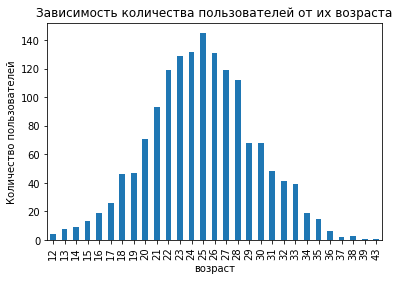

In [28]:
data_users['age'].value_counts().sort_index().plot(kind='bar', xlabel = 'возраст', ylabel = 'Количество пользователей', title = 'Зависимость количества пользователей от их возраста')

In [29]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

График похож на график нормального распределения, откуда можем предположить, что данные по возрасту собраны корректно


    
Минимальный возраст пользователя - 12 лет, максимальный - 43 года. Основной возрастной группой являются люди от 22 до 28 лет (таких в нащей выборке аж 50%), средний возраст всех пользователей составялет 24.9


3.4 расстояние, которое пользователь преодолел за одну поездку

In [30]:
display(data_rides['distance'].value_counts().sort_index())

0.855683       1
2.570787       1
4.329506       1
6.784447       1
7.097072       1
              ..
6724.932981    1
6760.940067    1
6908.491343    1
7066.003772    1
7211.007745    1
Name: distance, Length: 18068, dtype: int64

<AxesSubplot:title={'center':'Заисимость количества поездок от их дистанции'}, ylabel='Frequency'>

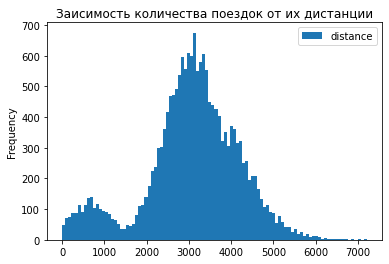

In [31]:
data_rides.plot(y = 'distance', kind = 'hist', bins = 100, range = (data_rides['distance'].min(), data_rides['distance'].max()), xlabel = 'дистанция поездки', ylabel = 'Количество поездок', title = 'Заисимость количества поездок от их дистанции')

3.5 продолжительность поездок.

In [32]:
display(data_rides['duration'].value_counts().sort_index())

0.500000     95
2.035632      1
2.053251      1
2.180879      1
2.222598      1
             ..
38.265229     1
38.352763     1
39.526602     1
39.873856     1
40.823963     1
Name: duration, Length: 17974, dtype: int64

<AxesSubplot:ylabel='Frequency'>

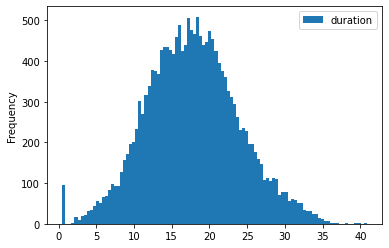

In [33]:
data_rides.plot(y = 'duration', kind = 'hist', bins = 100, range = (data_rides['duration'].min(), data_rides['duration'].max()), xlabel = 'время поездки', ylabel = 'Количество поездок')

На предпоследнем графике мы видим, что существует два локальных максимума, один из которых находится на отметке в 800 метров дистанции поездки. На последнем же графике мы видим, что есть около 100 поездок, которые длились 0.5 минуты, давайте разберемся выбросы ли это

In [34]:
duration_05 = data_rides.loc[data_rides['duration'] == 0.5]
display(duration_05)

,user_id,distance,duration,date,month,disatnce
6531,701,4196.445201,0.5,2021-08-31,8,4196.0
6570,704,4830.824371,0.5,2021-10-14,10,4831.0
6680,712,4684.004397,0.5,2021-03-04,3,4684.0
6695,713,5215.642710,0.5,2021-02-25,2,5216.0
6768,718,5197.436649,0.5,2021-02-11,2,5197.0
...,...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1,5531.0
17242,1477,6724.932981,0.5,2021-01-12,1,6725.0
17314,1483,4445.481070,0.5,2021-03-06,3,4445.0
17505,1496,5722.551787,0.5,2021-02-14,2,5723.0


Как мы видим поездок в 0.5 минуты 95, посмотрим какое расстояние за это время смогли преодалеть каждый из пользователей

<AxesSubplot:ylabel='Frequency'>

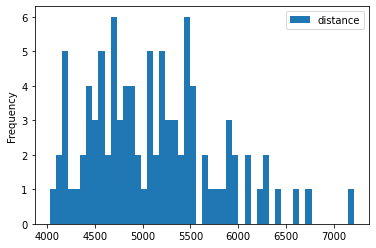

In [35]:
duration_05.plot(y = 'distance', kind = 'hist', bins = 50, range = (duration_05['distance'].min(), duration_05['distance'].max()), xlabel = 'дистанция поездки', ylabel = 'Количество поездок')

Как мы видим, значения дистанции не выявили никакой закономерности, вдобавок к этому заметим, что самокат за полминуты не может преодалеть растояние в 4 км и болл, поэтому, вероятнее всего, все поездки с продолжительностью в 0.5 минут являются выбросами. Удалим их из исходного датафрейма.

In [36]:
len_data_rides = len(data_rides)
data_rides = data_rides[data_rides['duration'] != 0.5]
print(f'процент удаленных данных равен {(1 - len(data_rides) / len_data_rides)*100}%')

процент удаленных данных равен 0.5257914545051978%


Что же касается графика с дистанцией поездки, давайте расмотрим этот график на участке от 0 до 1500 метров.

<AxesSubplot:ylabel='Frequency'>

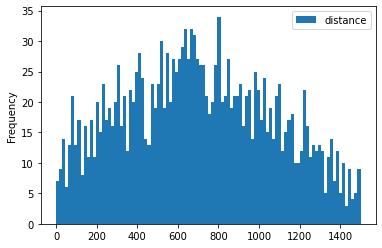

In [37]:
data_rides.query('distance < 1500').plot(y = 'distance', kind = 'hist', bins = 100, range = (0, 1500), xlabel = 'дистанция поездки', ylabel = 'Количество поездок')

Как мы видим на этом графике, все данные распределены равномерно на всем выбранном отрезеке, есть локальный максимум на отметке в около 700 метров, вероятнее всего эти данные не являются выбросами, ведь люди действительно могут проезжать расстояния на самокатах до 1500 метров. Вероятнее всего два локальных максимума на общем графике обусловлены тем, что у людей есть разные причины пользоваться самокатом, большинство из них использует его для прогулок по паркам или иного досуга, а есть и те, кто используют его для поездки на небольшие расстояния, например от метро до работы или дома.

__Шаг 4. Объединение данных__

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. 

Объединим для начала первые две таблицы

In [38]:
data = pd.merge(data_rides, data_users, on='user_id', how='left')
display(data.info())
display(data.sort_values(by = 'duration').head(5))
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   disatnce           17973 non-null  float64       
 6   name               17973 non-null  object        
 7   age                17973 non-null  int64         
 8   city               17973 non-null  object        
 9   subscription_type  17973 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 1.5+ MB


None

,user_id,distance,duration,date,month,disatnce,name,age,city,subscription_type
8885,880,11.283615,2.035632,2021-03-28,3,11.0,Евгений,29,Краснодар,free
6688,712,23.963062,2.053251,2021-11-22,11,24.0,Дарья,28,Москва,free
13249,1198,84.410014,2.180879,2021-06-11,6,84.0,Демид,29,Ростов-на-Дону,free
17217,1482,111.298857,2.222598,2021-07-24,7,111.0,Глеб,21,Краснодар,free
14017,1251,41.212830,2.224797,2021-04-15,4,41.0,Кирилл,25,Краснодар,free


user_id              0
distance             0
duration             0
date                 0
month                0
disatnce             0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Теперь добавим к этой таюлице значения из data_subscriptions

In [39]:
final_data = pd.merge(data, data_subscriptions, on='subscription_type', how='left')
data = pd.merge(data_rides, data_users, on='user_id', how='left')
display(final_data.info())
display(final_data.sort_values(by = 'duration').head(5))
display(final_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   disatnce           17973 non-null  float64       
 6   name               17973 non-null  object        
 7   age                17973 non-null  int64         
 8   city               17973 non-null  object        
 9   subscription_type  17973 non-null  object        
 10  minute_price       17973 non-null  int64         
 11  start_ride_price   17973 non-null  int64         
 12  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory 

None

,user_id,distance,duration,date,month,disatnce,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
8885,880,11.283615,2.035632,2021-03-28,3,11.0,Евгений,29,Краснодар,free,8,50,0
6688,712,23.963062,2.053251,2021-11-22,11,24.0,Дарья,28,Москва,free,8,50,0
13249,1198,84.410014,2.180879,2021-06-11,6,84.0,Демид,29,Ростов-на-Дону,free,8,50,0
17217,1482,111.298857,2.222598,2021-07-24,7,111.0,Глеб,21,Краснодар,free,8,50,0
14017,1251,41.212830,2.224797,2021-04-15,4,41.0,Кирилл,25,Краснодар,free,8,50,0


user_id              0
distance             0
duration             0
date                 0
month                0
disatnce             0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1

-c данными о пользователях без подписки;

-с данными о пользователях с подпиской.

In [40]:
people_unsubscribed = final_data.loc[final_data['subscription_type'] == 'free'] 
people_subscribed = final_data.loc[final_data['subscription_type'] != 'free']
display(people_unsubscribed.head(5))
display(people_subscribed.head(5))

,user_id,distance,duration,date,month,disatnce,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,2516.0,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,847.0,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,4004.0,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,1206.0,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,3047.0,Айдар,22,Омск,free,8,50,0


,user_id,distance,duration,date,month,disatnce,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,4410.0,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,2618.0,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,754.0,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,2695.0,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,4029.0,Кира,22,Тюмень,ultra,6,0,199


4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Для пользователей без подписки:

<AxesSubplot:title={'center':'Заисимость количетсва поездок от врмени у пользоватлей с подпиской'}, ylabel='Frequency'>

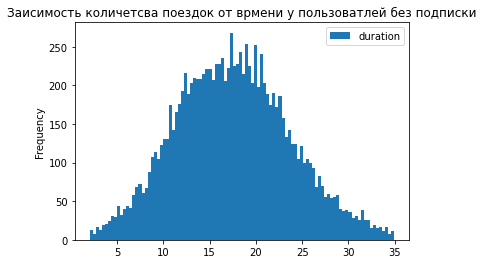

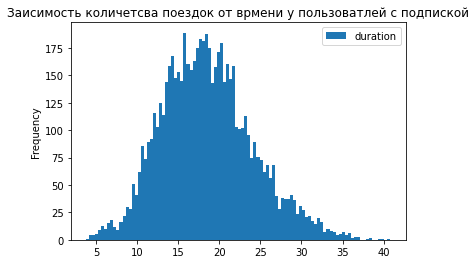

In [41]:
people_unsubscribed.plot(y = 'duration', kind = 'hist', bins = 100, range = (people_unsubscribed['duration'].min(), people_unsubscribed['duration'].max()), xlabel = 'время поездки', ylabel = 'Количество поездок', title = 'Заисимость количетсва поездок от врмени у пользоватлей без подписки')
people_subscribed.plot(y = 'duration', kind = 'hist', bins = 100, range = (people_subscribed['duration'].min(), people_subscribed['duration'].max()), xlabel = 'время поездки', ylabel = 'Количество поездок', title = 'Заисимость количетсва поездок от врмени у пользоватлей с подпиской')

Для людей с подпиской:

<AxesSubplot:title={'center':'Заисимость количетсва поездок от дистанции у пользоватлей с подпиской'}, ylabel='Frequency'>

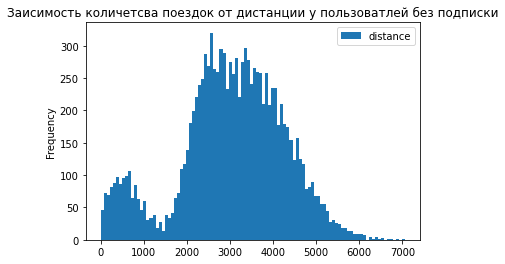

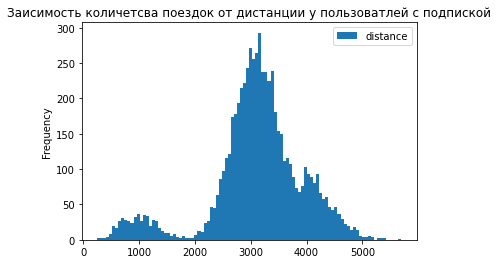

In [42]:
people_unsubscribed.plot(y = 'distance', kind = 'hist', bins = 100, range = (people_unsubscribed['distance'].min(), people_unsubscribed['distance'].max()), xlabel = 'дистанция поездки', ylabel = 'Количество поездок', title = 'Заисимость количетсва поездок от дистанции у пользоватлей без подписки')
people_subscribed.plot(y = 'distance', kind = 'hist', bins = 100, range = (people_subscribed['distance'].min(), people_subscribed['distance'].max()), xlabel = 'дистанция поездки', ylabel = 'Количество поездок', title = 'Заисимость количетсва поездок от дистанции у пользоватлей с подпиской')

In [43]:
print(f"Средняя дистанция у людей с подпиской: {people_subscribed['distance'].mean()}, у людей без подписки: {people_unsubscribed['distance'].mean()}")
print(f"Среднее время поездки у людей с подпиской: {people_subscribed['duration'].mean()}, у людей без подписки: {people_unsubscribed['duration'].mean()}")

Средняя дистанция у людей с подпиской: 3115.4453880370247, у людей без подписки: 3028.3742391936416
Среднее время поездки у людей с подпиской: 18.54198516280583, у людей без подписки: 17.530771268800226


Мы видим, что большой разницы в показателях времени поездки и расстояния у людей с подпиской и без нее нет

__Шаг 5. Подсчёт выручки__

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [44]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   disatnce           17973 non-null  float64       
 6   name               17973 non-null  object        
 7   age                17973 non-null  int64         
 8   city               17973 non-null  object        
 9   subscription_type  17973 non-null  object        
 10  minute_price       17973 non-null  int64         
 11  start_ride_price   17973 non-null  int64         
 12  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory 

In [45]:
groupby_columns = ['user_id', 'month']
final_data['starts'] = 1
aggregated_data = final_data.groupby(groupby_columns).agg({
    'distance': 'sum',
    'duration': 'sum',
    'age': 'first',
    'city': 'first',
    'subscription_fee': 'first',
    'minute_price': 'first',
    'start_ride_price': 'first',
    'subscription_type': 'first',
    'starts': 'count'
})

display(aggregated_data.head(10))


distance   duration  age    city  subscription_fee  \
user_id month                                                           
1       1       7027.511294  41.416640   22  Тюмень               199   
        4        754.159807   6.232113   22  Тюмень               199   
        8       6723.470560  44.776802   22  Тюмень               199   
        10      5809.911100  31.578017   22  Тюмень               199   
        11      7003.499363  53.397424   22  Тюмень               199   
        12      6751.629942  27.203912   22  Тюмень               199   
2       3      10187.723006  60.959959   31    Омск               199   
        4       6164.381824  39.048633   31    Омск               199   
        6       3255.338202  13.851127   31    Омск               199   
        7       6780.722964  46.170157   31    Омск               199   

               minute_price  start_ride_price subscription_type  starts  
user_id month                                                            
1       1                 6                 0             ultra       2  
        4                 6                 0             ultra       1  
        8                 6                 0             ultra       2  
        10                6                 0             ultra       2  
        11                6                 0             ultra       3  
        12                6                 0             ultra       2  
2       3                 6                 0             ultra       3  
        4                 6                 0             ultra       2  
        6                 6                 0             ultra       1  
        7                 6                 0             ultra       2

5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости будем округлять до следующего целого числа: например, значения 
25.3
25.3, 
25.5
25.5 и 
26.0
26.0 будут преобразованы к 
26.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8 рублей;
стоимость старта (начала поездки) — 
50 рублей;

с подпиской Ultra
абонентская плата — 
199 рублей в месяц;
стоимость одной минуты поездки — 
6 рублей;
стоимость старта — бесплатно.

In [46]:
aggregated_data['monthly_total'] = aggregated_data.apply(lambda x: (math.ceil(float(x['duration'])) * 8 + 50 * int(x['starts'])) if x['subscription_type'] == 'free' else (199 + math.ceil(float(x['duration'])) * 6), axis=1)

display(aggregated_data)

distance   duration  age       city  subscription_fee  \
user_id month                                                              
1       1       7027.511294  41.416640   22     Тюмень               199   
        4        754.159807   6.232113   22     Тюмень               199   
        8       6723.470560  44.776802   22     Тюмень               199   
        10      5809.911100  31.578017   22     Тюмень               199   
        11      7003.499363  53.397424   22     Тюмень               199   
...                     ...        ...  ...        ...               ...   
1534    6       3409.468534  24.812678   25  Краснодар                 0   
        8       7622.453034  47.205960   25  Краснодар                 0   
        9       4928.173852  22.560373   25  Краснодар                 0   
        11     13350.015305  76.342174   25  Краснодар                 0   
        12      2371.711192  15.893917   25  Краснодар                 0   

               minute_price  start_ride_price subscription_type  starts  \
user_id month                                                             
1       1                 6                 0             ultra       2   
        4                 6                 0             ultra       1   
        8                 6                 0             ultra       2   
        10                6                 0             ultra       2   
        11                6                 0             ultra       3   
...                     ...               ...               ...     ...   
1534    6                 8                50              free       2   
        8                 8                50              free       2   
        9                 8                50              free       1   
        11                8                50              free       4   
        12                8                50              free       1   

               monthly_total  
user_id month                 
1       1                451  
        4                241  
        8                469  
        10               391  
        11               523  
...                      ...  
1534    6                300  
        8                484  
        9                234  
        11               816  
        12               178  

[11300 rows x 10 columns]

__Шаг 6. Проверка гипотез__

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Для проверки гипотезы о том, тратят ли пользователи с подпиской больше времени на поездки, будем использовать статистический тест.

Нулевая гипотеза (H0): Среднее время поездок пользователей с подпиской не меньше, чем среднее время поездок пользователей без подписки.
Альтернативная гипотеза (H1): Среднее время поездок пользователей с подпиской меньше, чем среднее время поездок пользователей без подписки.

In [47]:
t_stat, p_value = ttest_ind(people_subscribed['duration'], people_unsubscribed['duration'], alternative='greater', equal_var=False)

print(f"t-статистика: {t_stat}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее время поездок пользователей с подпиской меньше")
else:
    print("Не удалось отвергнуть нулевую гипотезу: среднее время поездок пользователей с подпиской не меньше")

t-статистика: 11.24490594195034
P-значение: 1.6162210195311063e-29
Отвергаем нулевую гипотезу: среднее время поездок пользователей с подпиской меньше


Статичтический тест показал, что люди с подпиской тратят меньше времени на поездки, это означает, что компании нельзя их счиать более 'выгодными'

6.2 Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверьте гипотезу и сделайте выводы.

Для проверки гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, будем использовать аналогичный метод, основанный на t-тесте.

Нулевая гипотеза (H0): Среднее расстояние поездок пользователей с подпиской не превышает 3130 метров.

Альтернативная гипотеза (H1): Среднее расстояние поездок пользователей с подпиской больше 3130 метров.

In [48]:
t_stat, p_value = ttest_1samp(people_subscribed['duration'], popmean=3130, alternative='greater')

print(f"t-статистика: {t_stat}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской больше 3130 метров")
else:
    print("Не удалось отвергнуть нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не больше 3130 метров")

t-статистика: -45020.02675908614
P-значение: 1.0
Не удалось отвергнуть нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не больше 3130 метров


Тест показал, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров, а значит они не вредят самокатам с точки зрения износа

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Посчитаем общую выручку по месяцам для людей с подпиской и без нее

In [49]:
display(aggregated_data)

distance   duration  age       city  subscription_fee  \
user_id month                                                              
1       1       7027.511294  41.416640   22     Тюмень               199   
        4        754.159807   6.232113   22     Тюмень               199   
        8       6723.470560  44.776802   22     Тюмень               199   
        10      5809.911100  31.578017   22     Тюмень               199   
        11      7003.499363  53.397424   22     Тюмень               199   
...                     ...        ...  ...        ...               ...   
1534    6       3409.468534  24.812678   25  Краснодар                 0   
        8       7622.453034  47.205960   25  Краснодар                 0   
        9       4928.173852  22.560373   25  Краснодар                 0   
        11     13350.015305  76.342174   25  Краснодар                 0   
        12      2371.711192  15.893917   25  Краснодар                 0   

               minute_price  start_ride_price subscription_type  starts  \
user_id month                                                             
1       1                 6                 0             ultra       2   
        4                 6                 0             ultra       1   
        8                 6                 0             ultra       2   
        10                6                 0             ultra       2   
        11                6                 0             ultra       3   
...                     ...               ...               ...     ...   
1534    6                 8                50              free       2   
        8                 8                50              free       2   
        9                 8                50              free       1   
        11                8                50              free       4   
        12                8                50              free       1   

               monthly_total  
user_id month                 
1       1                451  
        4                241  
        8                469  
        10               391  
        11               523  
...                      ...  
1534    6                300  
        8                484  
        9                234  
        11               816  
        12               178  

[11300 rows x 10 columns]

In [50]:
groupby_columns = ['month', 'subscription_type']
data_for63 = aggregated_data.groupby(groupby_columns).agg({
    'monthly_total': 'sum'
})

display(data_for63)

monthly_total
month subscription_type               
1     free                      191856
      ultra                     143502
2     free                      164064
      ultra                     124266
3     free                      185032
      ultra                     142074
4     free                      183544
      ultra                     136826
5     free                      185878
      ultra                     148647
6     free                      190214
      ultra                     143342
7     free                      183168
      ultra                     142896
8     free                      184972
      ultra                     138096
9     free                      191768
      ultra                     128863
10    free                      179500
      ultra                     133446
11    free                      176990
      ultra                     126096
12    free                      192808
      ultra                     130543

<AxesSubplot:title={'center':'Monthly Total by Subscription Type'}, xlabel='Month', ylabel='Monthly Total'>

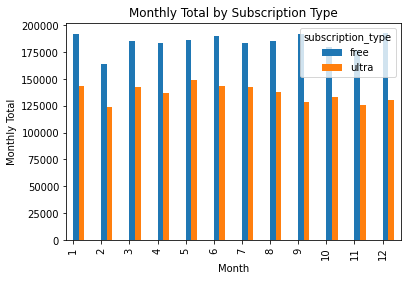

In [51]:
grouped_data_for63 = data_for63.pivot_table(index='month', columns='subscription_type', values='monthly_total')

grouped_data_for63.plot(kind='bar', position=0, width=0.4, title='Monthly Total by Subscription Type', xlabel='Month', ylabel='Monthly Total')


Из графика и таблицы делаем вывод, что общая помесечная прибыль больше с людей, у которых нет подписки
Теперь посчитаем среднее значение

In [52]:
groupby_columns = ['month', 'subscription_type']
data_for63 = aggregated_data.groupby(groupby_columns).agg({
    'monthly_total': 'mean'
})

display(data_for63)

monthly_total
month subscription_type               
1     free                  321.906040
      ultra                 367.953846
2     free                  313.099237
      ultra                 351.033898
3     free                  335.811252
      ultra                 358.772727
4     free                  332.507246
      ultra                 365.844920
5     free                  324.961538
      ultra                 367.029630
6     free                  324.044293
      ultra                 360.155779
7     free                  326.502674
      ultra                 366.400000
8     free                  328.547069
      ultra                 359.625000
9     free                  332.930556
      ultra                 362.994366
10    free                  328.754579
      ultra                 358.725806
11    free                  320.054250
      ultra                 356.203390
12    free                  329.023891
      ultra                 361.614958

<AxesSubplot:title={'center':'Monthly Total by Subscription Type'}, xlabel='Month', ylabel='Monthly Total'>

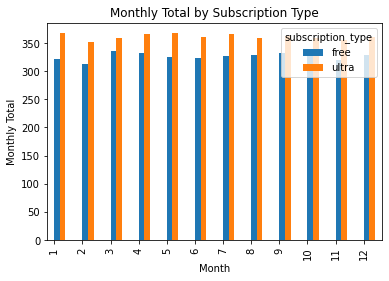

In [53]:
grouped_data_for63 = data_for63.pivot_table(index='month', columns='subscription_type', values='monthly_total')

grouped_data_for63.plot(kind='bar', position=0, width=0.4, title='Monthly Total by Subscription Type', xlabel='Month', ylabel='Monthly Total')


На этом же графике и таблице мы видим, что в среднем люди с подпиской платят больше чем люди без нее. Следовательно  в среднем выручка с одного человека с подпиской больше чем с человека без подписки

Для проверки гипотезы о том, будет ли помесячная выручка от пользователей с подпиской выше, чем у пользователей без подписки, воспользуемся t-тестом для независимых выборок.

Нулевая гипотеза (H0): Средняя выручка от пользователей с подпиской не превышает среднюю выручку от пользователей без подписки.
Альтернативная гипотеза (H1): Средняя выручка от пользователей с подпиской выше средней выручки от пользователей без подписки.

In [54]:
t_stat, p_value = ttest_ind(aggregated_data[aggregated_data['subscription_type'] == 'ultra']['monthly_total'], aggregated_data[aggregated_data['subscription_type'] == 'free']['monthly_total'], equal_var=False)

print(f"t-статистика: {t_stat}")
print(f"P-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средняя выручка от пользователей с подпиской выше")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средняя выручка от пользователей с подпиской не превышает выручки от пользователей без подписки")

t-статистика: 13.773667511671047
P-значение: 8.716480143060768e-43
Отвергаем нулевую гипотезу: средняя выручка от пользователей с подпиской выше


Благодаря статистическому тесту нам стало понятно, что средняя выручка от пользователей с подпиской выше.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Мы хотим проверить гипотезу о том, что обновление серверов снизило количество обращений в техподдержку. Нулевая гипотеза (H0) звучит как "среднее количество обращений до и после обновления серверов равны", в то время как альтернативная гипотеза (H1) утверждает, что "среднее количество обращений до и после обновления серверов не равны". Мы выбираем уровень значимости, например, 0.05, и используем t-тест для независимых выборок, так как у нас есть две независимые группы пользователей (до и после обновления). Собираем данные о количестве обращений для каждого пользователя до и после обновления, применяем t-тест и, если p-value меньше выбранного уровня значимости, отклоняем нулевую гипотезу. Таким образом, мы понимаем, что есть статистически значимые различия в количестве обращений до и после обновления серверов в будущем.

__Общий вывод__

В ходе исследования были рассмотрены несколько гипотез, нацеленных на понимание ключевых аспектов поведения пользователей и эффективности бизнес-модели. Результаты анализа продолжительности поездок показали, что пользователи с подпиской не только тратят меньше времени на поездки, но и не превышают оптимальное расстояние в 3130 метров, что положительно сказывается на состоянии самокатов.

Особенно важным выводом является тот факт, что, несмотря на возможное уменьшение выручки от пользователей с подпиской, эти пользователи представляют ценность для компании в других аспектах. Например, они могут быть более лояльными клиентами или внести вклад в популяризацию сервиса.

В целом, проведенные анализы и статистические тесты предоставили ценные инсайты о поведении пользователей, эффективности бизнес-модели и воздействии технических изменений на взаимодействие с сервисом. Выводы этого исследования представляют важную основу для разработки стратегий улучшения сервиса и оптимизации взаимодействия с клиентами.